## 1. Business Problem

#### Sushi is popular around the world,the term sushi actually refers to foods that use a type of rice seasoned with vinegar and are garnished with raw fish or vegetable. There are several types of sushi, making it an appealing food to people with a wide range of tastes. One form of sushi, nigiri-zushi, are hand-formed mounds of rice with a dab of wasabi topped with various ingredients. Popular nigiri-zushi include maguro (tuna), toro (belly of tuna), hamachi (yellowtail), and ebi (shrimp).

#### A client of mine who is based in Orlando, Florida, wants to start a Sushi Restaurant with the concept of selling japanese cuisine. It mainly concentrates on foods like shrimp, escolar, tuna, red snapper etc. These foods are pretty quick to cook and serve to the customers. The main goal of the client is to aim at the customers like students, business employees, residents, shopping malls, or mostly commonly visited places by the public. The challenge is to find the top three neighborhoods among the most popular neighborhoods in Orlando, Florida so that my client can kick-start their business and estimate the turn out profits in the next two to three years by concentrating on the top three neighborhoods.

#### This business problem mainly concentrates on finding the top three neighborhoods to start the Sushi Restaurant.

## 2. Data

### Source
##### List of the neighborhoods in Orlando, FL: https://data.cityoforlando.net/Government-General/Neighborhoods/dpx3-qjrc
##### FourSquare data to find the popular venues
##### How will the data be used to answer the business needs?
##### The data mentioned above will be used to explore and target locations across different venues present in the neighborhoods.
##### 1. Use Foursquare and geopy data to map top venues for the super neighborhoods of Orlando and cluster them in groups
##### 2. City-Data to get the neighborhoods information
##### 3. Additional data will be added from open data sources if available in the future if the data is insufficient
###### By extracting the venues of the neighborhoods we can determine the most visited venues which would determine that the customer count is high in that area. By using Foursquare data and the Orlando's neighborhood data, we can recommend the top three neighborhoods by performing machine learning techniques and can visualize them through a graph or a map.


### Installing Required Packages to load the data

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

#import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # 
!pip install  folium 
import folium # map rendering library

#!conda install -c conda-forge lxml --yes
!pip install lxml
#Lib for html handling
from lxml import html

#Beautiful soup to extract the neighborhoods names
!pip install beautifulsoup4
from bs4 import BeautifulSoup

print('Libraries imported.')

Libraries imported.


In [5]:
from geopy.geocoders import Nominatim

In [2]:
data = pd.read_csv('C:/Users/jahna/Downloads/mco.csv')
data.head()

,the_geom,NBHDID,NBHDNAME,COLOR
0,MULTIPOLYGON (((-81.40938965865213 28.49422746...,110,Park Central,10551295
1,MULTIPOLYGON (((-81.38217375194158 28.51274701...,112,Lake Holden,16752895
2,MULTIPOLYGON (((-81.29578617870794 28.49571779...,113,Pershing,16752895
3,MULTIPOLYGON (((-81.31051469166141 28.54720993...,4,Azalea Park,10551295
4,MULTIPOLYGON (((-81.31456291107887 28.51490542...,7,Bryn Mawr,16752895


#### Renaming the NBHDID to Neighborhood

In [3]:
df_mco = data.rename(columns={data.columns[2]: 'Neighborhood'})
df_mco.head()

,the_geom,NBHDID,Neighborhood,COLOR
0,MULTIPOLYGON (((-81.40938965865213 28.49422746...,110,Park Central,10551295
1,MULTIPOLYGON (((-81.38217375194158 28.51274701...,112,Lake Holden,16752895
2,MULTIPOLYGON (((-81.29578617870794 28.49571779...,113,Pershing,16752895
3,MULTIPOLYGON (((-81.31051469166141 28.54720993...,4,Azalea Park,10551295
4,MULTIPOLYGON (((-81.31456291107887 28.51490542...,7,Bryn Mawr,16752895


#### Getting Longitude and Latitude values of Orlando using geolocator

In [6]:
address = 'Orlando, FL'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print("Geographical co-ordinates of Orlando, FL are (lat):{} and (long): {}".format(latitude, longitude))

Geographical co-ordinates of Orlando, FL are (lat):28.5421109 and (long): -81.3790304


#### Create lists for lat and long

In [7]:
lat = []
lng = []

#Loop through all neigborhoods in Orlando
for adr in df_mco['Neighborhood']:
    #Use geolocator to get coordinates of neigborhoods within Orlando
    loc = geolocator.geocode(adr+','+ 'Orlando'+','+'FL')
    if loc == None:
        lat.append('NAN')
        lng.append('NAN')
    #Append coordinates to lists
    else:
        lat.append(loc.latitude)
        lng.append(loc.longitude)

#Map coordinate lists to data frame 

df_mco['lat'] = lat
df_mco['lng'] = lng

#### Checking For NANA values in lat column of dataframe

In [8]:
df_mco['lat']=='NAN'

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25      True
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

#### Removing lat and lng columns with NAN values in dataframe
#### Renaming lat and lng columns as Latitude and Longitude

In [9]:
df1 = df_mco[df_mco['lat'] != 'NAN']
df1 = df_mco[df_mco['lng'] != 'NAN']
df1 = df1.rename(columns = {"lat": "Latitude", "lng": "Longitude"})
df1

,the_geom,NBHDID,Neighborhood,COLOR,Latitude,Longitude
0,MULTIPOLYGON (((-81.40938965865213 28.49422746...,110,Park Central,10551295,28.4904,-81.4135
1,MULTIPOLYGON (((-81.38217375194158 28.51274701...,112,Lake Holden,16752895,28.5049,-81.3853
2,MULTIPOLYGON (((-81.29578617870794 28.49571779...,113,Pershing,16752895,28.4973,-81.2963
3,MULTIPOLYGON (((-81.31051469166141 28.54720993...,4,Azalea Park,10551295,28.5474,-81.301
4,MULTIPOLYGON (((-81.31456291107887 28.51490542...,7,Bryn Mawr,16752895,28.5102,-81.3237
5,MULTIPOLYGON (((-81.383047408998 28.5493836366...,8,Callahan,10551295,28.5329,-81.3861
6,MULTIPOLYGON (((-81.33508364185711 28.51333471...,93,Wedgewood Groves,16777104,28.5159,-81.3372
7,MULTIPOLYGON (((-81.33088101669067 28.46581698...,60,Crescent Park,10535167,28.4637,-81.336
8,MULTIPOLYGON (((-81.40966563456848 28.54458254...,95,Westfield,16752895,28.543,-81.4077
9,MULTIPOLYGON (((-81.45894461674486 28.48973149...,96,Windhover,16752895,28.4884,-81.4628


#### Created a df that consists of the required columns

In [10]:
df_neigh = df1[["Neighborhood", "Longitude", "Latitude"]]
df_neigh

,Neighborhood,Longitude,Latitude
0,Park Central,-81.4135,28.4904
1,Lake Holden,-81.3853,28.5049
2,Pershing,-81.2963,28.4973
3,Azalea Park,-81.301,28.5474
4,Bryn Mawr,-81.3237,28.5102
5,Callahan,-81.3861,28.5329
6,Wedgewood Groves,-81.3372,28.5159
7,Crescent Park,-81.336,28.4637
8,Westfield,-81.4077,28.543
9,Windhover,-81.4628,28.4884


#### To know dataframe satistucally

In [11]:
df_neigh.describe()

,Neighborhood,Longitude,Latitude
count,122,122.000000,122.000000
unique,122,122.000000,122.000000
top,Rock Lake,-81.314486,28.504864
freq,1,1.000000,1.000000


## 3. Methodology

#### Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, and what machine learnings were used and why.

#### With above data, I can use the concept of manually assigning weights to calculate a score and predict the most popular neighborhood to resolve the problem.

#### Combine with FourSquare API which provides how many venues in different category of Shoping Malls, Universities, Residential Areas and Offices, a matrix which captured characteristic of venues are built. Client's list is the profile to combine with the matrix to become a weighted matrix of most favorable spot.

#### The weighted matrix can be applied on several target locations with venues information to generate a ranking result by using indexes. The the top three on the ranking list can be recommended to the client.

#### The required analysis with the data to build a matrix has been done already like removing NANs, renaming required columns and selecting columns that I require for the analysis. 

In [12]:
df_neigh.head()

,Neighborhood,Longitude,Latitude
0,Park Central,-81.4135,28.4904
1,Lake Holden,-81.3853,28.5049
2,Pershing,-81.2963,28.4973
3,Azalea Park,-81.301,28.5474
4,Bryn Mawr,-81.3237,28.5102


#### Now we map the houston neighborhoods using folium

In [13]:
orlando = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_neigh['Latitude'], df_neigh['Longitude'], df_neigh['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(orlando)  
    
orlando

#### From the map I can observe that the super neighborhoods are spread across the map. My next step is to use foursquare API and get the venues of those neighborhoods.

In [14]:
#Defining foursquare API credentials and limit of the venues of each neighborhood

CLIENT_ID = 'ZG4PTBXMTKNZQWSFJBDJYS0ZHOLDR5BRFTJZCYL2Y3FAXMR0' # your Foursquare ID
CLIENT_SECRET = 'BQPQT4PJPQYZVNDRCEXKLB2UI4KK1B21AFBLEP2OBOSH1IKA' # your Foursquare Secret
VERSION = '20200716' # Todays Date

Limit = 300 # limit of number of venues returned by Foursquare API
radius = 750 # define radius

#### Defining a function to get the nearby venues of each neighbourhood using foursquare API

In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=750, categoryIds=''):
    
    venues_list=[]
    print('Venues for the Houston Neighborhoods are being retrieved:')
    for name, lat, lng in zip(names, latitudes, longitudes):

            
        # creating an API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            Limit)
        
        if(categoryIds!=''):
            url = url+'&categoryId={}'
            url = url.format(categoryIds)
        
        #Get Request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        venues_list.append([(
                   name, 
                   lat, 
                   lng, 
                   v['venue']['name'], 
                   v['venue']['location']['lat'], 
                   v['venue']['location']['lng'],
                   v['venue']['categories'][0]['id'],
                   v['venue']['categories'][0]['name']) for v in results])
        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',
                  'Venue ID',
                  'Venue Category']
    print('Data Retrieved')    
    return(nearby_venues)


#### Defining a function to add markers for given venues to map

In [16]:
def addToMap(df, color, existingMap):
    for lat, lng, local, venue, venueCat in zip(df['Venue Latitude'], df['Venue Longitude'], df['Neighborhood'], df['Venue'], df['Venue Category']):
        label = '{} ({}) - {}'.format(venue, venueCat, local)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7).add_to(existingMap)

#### Now we retrieve specific venues by passing the category IDs. Category IDs are listed in the following Foursquare API documentation.

https://developer.foursquare.com/docs/build-with-foursquare/categories/

In [19]:
#Retrieving the data for the neighbourhoods to get only sushi restaurants

orlando_venues = getNearbyVenues(names=df_neigh['Neighborhood'],
                                        latitudes=df_neigh['Latitude'],
                                        longitudes=df_neigh['Longitude'],
                                         radius=750,
                                         categoryIds='4bf58dd8d48988d1d2941735'
                                )

Venues for the Houston Neighborhoods are being retrieved:
Data Retrieved


In [20]:
print(orlando_venues.shape)
orlando_venues_grouped = orlando_venues.groupby('Neighborhood').count().sort_values(by=['Venue']).reset_index()
orlando_venues_grouped.head()

(49, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue ID,Venue Category
0,Lake Eola Heights,1,1,1,1,1,1,1
1,South Semoran,1,1,1,1,1,1,1
2,South Orange,1,1,1,1,1,1,1
3,Rowena Gardens,1,1,1,1,1,1,1
4,Park Lake/Highland,1,1,1,1,1,1,1


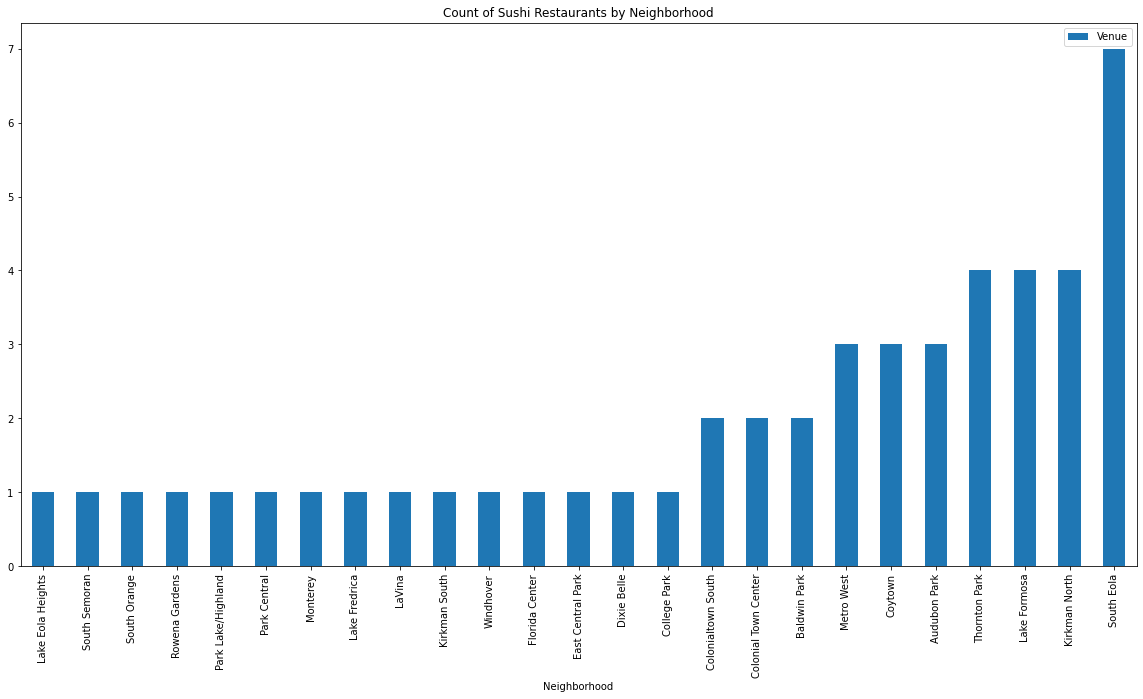

In [21]:
orlando_venues_grouped.plot.bar(x='Neighborhood'
                                          , y = 'Venue'
                                          , rot =90
                                          , figsize=(20, 10)
                                          , title='Count of Sushi Restaurants by Neighborhood'
                                         )

#### From the bar graph above we can observe that the count of Sushi Restaurants is high in the following Neighborhoods,

#### South Eola
#### Krikman North
#### Lake Formosa
#### The Thornton Park has also the same count as Krikman North and Lake Formosa but since we want to concentrate on the top 3 places I choose only those three.

#### But this information is not sufficient. We will be retrieving the data for the following venues with residential areas, universities, offices, shopping malls and additional information if required.

In [22]:
#Retrieving the data for the neighbourhoods to get only Univesities

orlando_venues_universities = getNearbyVenues(names=df_neigh['Neighborhood'],
                                        latitudes=df_neigh['Latitude'],
                                        longitudes=df_neigh['Longitude'],
                                         radius=1500,
                                         categoryIds='4bf58dd8d48988d1ae941735'
                                )

Venues for the Houston Neighborhoods are being retrieved:
Data Retrieved


In [23]:
print(orlando_venues_universities.shape)
orlando_venues_universities.head()

(60, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue ID,Venue Category
0,Park Central,28.490374,-81.413479,Keller Graduate School of Management,28.492397,-81.427429,4bf58dd8d48988d1ae941735,University
1,Lake Holden,28.504864,-81.385332,"National University - Orlando, Florida",28.515111,-81.378086,4bf58dd8d48988d1ae941735,University
2,Azalea Park,28.547361,-81.301047,Keiser University OT lab,28.542891,-81.310440,4bf58dd8d48988d1ae941735,University
3,Azalea Park,28.547361,-81.301047,Keiser University FA,28.538202,-81.312124,4bf58dd8d48988d1ae941735,University
4,Azalea Park,28.547361,-81.301047,Keiser University RT Lab,28.538045,-81.311636,4bf58dd8d48988d1a5941735,College Lab


In [24]:
map_orlando_universities = folium.Map(location=[latitude, longitude], zoom_start=12)
addToMap(orlando_venues_universities, 'green', map_orlando_universities)
map_orlando_universities.save('map_orlando_universities.html')

In [25]:
# Retrieving the data for the neighbourhoods to get only Offices

orlando_venues_offices = getNearbyVenues(names=df_neigh['Neighborhood'],
                                        latitudes=df_neigh['Latitude'],
                                        longitudes=df_neigh['Longitude'],
                                         radius=2000,
                                         categoryIds='4d4b7105d754a06375d81259'
                                )

Venues for the Houston Neighborhoods are being retrieved:
Data Retrieved


In [26]:
print(orlando_venues_offices.shape)
orlando_venues_offices.head()

(9482, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue ID,Venue Category
0,Park Central,28.490374,-81.413479,AT&T,28.486281,-81.427046,4f04afc02fb6e1c99f3db0bc,Mobile Phone Shop
1,Park Central,28.490374,-81.413479,Regions Bank,28.490725,-81.429168,4bf58dd8d48988d130941735,Building
2,Park Central,28.490374,-81.413479,Best Staffing Orlando,28.497381,-81.398712,5453de49498eade8af355881,Business Service
3,Park Central,28.490374,-81.413479,Park Central Leasing Office,28.491662,-81.414621,4bf58dd8d48988d124941735,Office
4,Park Central,28.490374,-81.413479,Esplanade Apartment Homes,28.484507,-81.403859,4d954b06a243a5684965b473,Residential Building (Apartment / Condo)


In [27]:
map_orlando_office = folium.Map(location=[latitude, longitude], zoom_start=12)
addToMap(orlando_venues_offices, 'blue', map_orlando_office )
map_orlando_office.save('map_orlando_office.html')

In [28]:
# Retrieving the data for the neighbourhoods to get only Residential Areas

orlando_venues_residential = getNearbyVenues(names=df_neigh['Neighborhood'],
                                        latitudes=df_neigh['Latitude'],
                                        longitudes=df_neigh['Longitude'],
                                         radius=2000,
                                         categoryIds='4e67e38e036454776db1fb3a'
                                )

Venues for the Houston Neighborhoods are being retrieved:
Data Retrieved


In [29]:
print(orlando_venues_residential.shape)
orlando_venues_residential.head()

(1282, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue ID,Venue Category
0,Park Central,28.490374,-81.413479,The Estates at Park Central,28.491245,-81.413213,4d954b06a243a5684965b473,Residential Building (Apartment / Condo)
1,Park Central,28.490374,-81.413479,Park Central Apartments,28.491979,-81.415546,4d954b06a243a5684965b473,Residential Building (Apartment / Condo)
2,Park Central,28.490374,-81.413479,Park Central - Manor Row,28.491299,-81.416308,4d954b06a243a5684965b473,Residential Building (Apartment / Condo)
3,Park Central,28.490374,-81.413479,M North,28.495728,-81.419100,4d954b06a243a5684965b473,Residential Building (Apartment / Condo)
4,Park Central,28.490374,-81.413479,Mosaic at Millenia,28.489753,-81.421870,4d954b06a243a5684965b473,Residential Building (Apartment / Condo)


In [30]:
map_orlando_residential = folium.Map(location=[latitude, longitude], zoom_start=12)
addToMap(orlando_venues_residential, 'red', map_orlando_residential )
map_orlando_residential.save('map_orlando_residential.html')

In [31]:
#Retrieving the data for the neighbourhoods to get only Shopping Malls

orlando_venues_shoppingmall = getNearbyVenues(names=df_neigh['Neighborhood'],
                                        latitudes=df_neigh['Latitude'],
                                        longitudes=df_neigh['Longitude'],
                                         radius=500,
                                         categoryIds='5744ccdfe4b0c0459246b4dc'
                                )

Venues for the Houston Neighborhoods are being retrieved:
Data Retrieved


In [32]:
print(orlando_venues_shoppingmall.shape)
orlando_venues_shoppingmall.head()

(2, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue ID,Venue Category
0,Windhover,28.488422,-81.462839,Kirkman Shoppes,28.492315,-81.460689,5744ccdfe4b0c0459246b4dc,Shopping Plaza
1,South Orange,28.516996,-81.378699,Sodo S.C.,28.516126,-81.378286,5744ccdfe4b0c0459246b4dc,Shopping Plaza


In [33]:
map_orlando_mall = folium.Map(location=[latitude, longitude], zoom_start=12)
addToMap(orlando_venues_shoppingmall, 'yellow', map_orlando_mall )
map_orlando_mall.save('map_orlando_mall.html')

#### Now we have the most visited or busiest places among the neighborhoods. Next step is to merge the columns.

In [34]:
def addColumn(startDf, columnTitle, dataDf):
    grouped = dataDf.groupby('Neighborhood').count()
    
    for n in startDf['Neighborhood']:
        try:
            startDf.loc[startDf['Neighborhood'] == n,columnTitle] = grouped.loc[n, 'Venue']
        except:
            startDf.loc[startDf['Neighborhood'] == n,columnTitle] = 0

In [35]:
df_orlando_merged = df_neigh

#adding count columns for schools to the pre processed orlando data
addColumn(df_orlando_merged, 'Residential Area', orlando_venues_residential)

#adding count columns for university to the pre processed orlando data
addColumn(df_orlando_merged, 'University', orlando_venues_universities)

#adding count columns for offices to the pre processed orlando data
addColumn(df_orlando_merged, 'Offices', orlando_venues_offices)

#adding count columns for shopping malls to the pre processed orlando data
addColumn(df_orlando_merged, 'shopping mall', orlando_venues_shoppingmall)

#adding count columns for sushi restaurant to the pre processed orlando data
addColumn(df_orlando_merged, 'Sushi', orlando_venues)

df_orlando_merged.head()

C:\Users\jahna\anaconda3\envs\py36\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\jahna\anaconda3\envs\py36\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Neighborhood,Longitude,Latitude,Residential Area,University,Offices,shopping mall,Sushi
0,Park Central,-81.4135,28.4904,20.0,1.0,78.0,0.0,1.0
1,Lake Holden,-81.3853,28.5049,5.0,1.0,82.0,0.0,0.0
2,Pershing,-81.2963,28.4973,6.0,0.0,72.0,0.0,0.0
3,Azalea Park,-81.301,28.5474,4.0,3.0,88.0,0.0,0.0
4,Bryn Mawr,-81.3237,28.5102,16.0,0.0,100.0,0.0,0.0


#### Now Assigning weights. Since we do not want to concur with other food trucks, we assign

#### Negative weight, because client wants to run the truck where the competition is less
#### Positive weight, because the traffic would be high in the mall area during workdays and weekends
#### Positive weight, because residents would quickly grab food instead of going far places during traffic on weekdays and during weekends they can hang out with people
#### Positive weight, because university students would be frequent customers
#### Positive weight, because employees would like to have a quick lunch and get back to work and the traffic will be more compared to others

In [36]:
#Assigning weights
weight_sushi = -1
weight_malls = 1.5
weight_residents = 1
weight_univs = 1.5
weight_offices = 2

#### Now we create a matrix with the weights assigned and calculate the score. Then we sort it by descending order.

#### x = (y i) + (y1 i1)+...........+(n * m)

#### Formula In-efficient for large dataset

In [39]:
df_orlando_weighted = df_orlando_merged

df_orlando_weighted['Weighted Score'] = df_orlando_merged['Sushi'] * weight_sushi + df_orlando_merged['University'] * weight_univs + df_orlando_merged['Residential Area'] * weight_residents + df_orlando_merged['Offices'] * weight_offices + df_orlando_merged['shopping mall'] * weight_malls

df_orlando_weighted = df_orlando_weighted.sort_values(by=['Weighted Score'], ascending = False).reset_index(drop = True)
df_orlando_weighted.head(10)

,Neighborhood,Longitude,Latitude,Residential Area,University,Offices,shopping mall,Sushi,Weighted Score
0,Lake Eola Heights,-81.3706,28.5499,39.0,2.0,100.0,0.0,1.0,241.0
1,Holden/Parramore,-81.3899,28.537,35.0,1.0,100.0,0.0,0.0,236.5
2,South Eola,-81.373,28.544,39.0,2.0,100.0,0.0,7.0,235.0
3,Lake Dot,-81.3867,28.5521,31.0,1.0,100.0,0.0,0.0,232.5
4,Lake Cherokee,-81.3712,28.5333,30.0,1.0,100.0,0.0,0.0,231.5
5,Thornton Park,-81.3646,28.5433,31.0,2.0,100.0,0.0,4.0,230.0
6,Lake Copeland,-81.3747,28.5272,28.0,1.0,100.0,0.0,0.0,229.5
7,Callahan,-81.3861,28.5329,28.0,1.0,100.0,0.0,0.0,229.5
8,Delaney Park,-81.3716,28.5291,29.0,0.0,100.0,0.0,0.0,229.0
9,Park Lake/Highland,-81.3691,28.5586,25.0,1.0,100.0,0.0,1.0,225.5


## 4. Results
### The indexes are the ranks of the neighborhoods

In [40]:
df_sushi_topLocations = df_orlando_weighted.iloc[:3]

df_sushi_topLocations

,Neighborhood,Longitude,Latitude,Residential Area,University,Offices,shopping mall,Sushi,Weighted Score
0,Lake Eola Heights,-81.3706,28.5499,39.0,2.0,100.0,0.0,1.0,241.0
1,Holden/Parramore,-81.3899,28.537,35.0,1.0,100.0,0.0,0.0,236.5
2,South Eola,-81.373,28.544,39.0,2.0,100.0,0.0,7.0,235.0


#### After the analysis and calculations we can observe the top three neighborhoods in Orlando to start the Sushi Restaurant are,

#### Memorial
#### Third Ward
#### Medical Center
#### Mapping the top three neighborhoods that are predicted during our analysis

In [43]:
map_sushi_result = folium.Map(location=[latitude, longitude], zoom_start=11.5)

for lat, lng, neigh in zip(df_sushi_topLocations['Latitude'], df_sushi_topLocations ['Longitude'], df_sushi_topLocations['Neighborhood']):
    label = '{}'.format(neigh)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
    [lat,lng],
    radius=50,
    popup=label,
    color='darkgreen',
    fill_opacity=1.0).add_to(map_sushi_result)

for ix in df_sushi_topLocations.index[:3]:
    addToMap(orlando_venues_residential[orlando_venues_residential['Neighborhood'] == df_sushi_topLocations['Neighborhood'][ix]], 'red', map_sushi_result)
    addToMap(orlando_venues_universities[orlando_venues_universities['Neighborhood'] == df_sushi_topLocations['Neighborhood'][ix]], 'green', map_sushi_result)
    addToMap(orlando_venues_offices[orlando_venues_offices['Neighborhood'] == df_sushi_topLocations['Neighborhood'][ix]], 'blue', map_sushi_result)
    addToMap(orlando_venues_shoppingmall[orlando_venues_shoppingmall['Neighborhood'] == df_sushi_topLocations['Neighborhood'][ix]], 'yellow', map_sushi_result)

map_sushi_result.save('Sushi_Result.html')

## 5. Discussion

#### From our initial analysis we could observe that the top 3 neighborhoods based on the count of Sushi Restaurants per neighborhood were Binz, Museum District and Medical Center

#### Client was worried about their competition and wanted to find the least concurrent places where the client can avoid other competitors

#### For further analysis I downloaded residential area , office, shopping mall and university as they would be great target audience and assigned them weights according to their traffic, and also assigned weight to the sushi restaurant  data too to avoid concurrence with the other competitors

#### Weighted scores are calculated and the result is sorted according to their weighted score which yielded us the top 3 neighborhoods

#### We can also suggest the next 3 neighborhoods for the clients according to our analysis which would be

Wayside
Museum District
Pembertown

### Limitations
#### Geo py could not yield the results for all the super neighborhoods in houston which were excluded from the data
#### Accuracy of venues purely depends on Foursquare

## 6. Conclusion
#### Based on our analysis the client should start their Sushi Restaurant in the following three neighborhoods,

#### Memorial
#### Third Ward
#### Medical Center

#### Upon further analysis, the client can also do business in the next three neighborhoods,

#### Wayside
#### Museum District
#### Pembertown